In [12]:
import numpy as np
import healpy as hp
import matplotlib.pylab as plt
%matplotlib inline
from rubin_scheduler.utils import ra_dec2_hpid, hpid2_ra_dec
from rubin_scheduler.scheduler.utils import EuclidOverlapFootprint, SkyAreaGeneratorGalplane, SkyAreaGenerator
import os
os.environ["RUBIN_SIM_DATA_DIR"] = "/sdf/data/rubin/shared/rubin_sim_data"
import pandas as pd
import matplotlib as mpl

In [118]:
# generate the latest footprint
nside = 512
fpg = EuclidOverlapFootprint(nside=nside)
maps_arr, labels = fpg.return_maps()

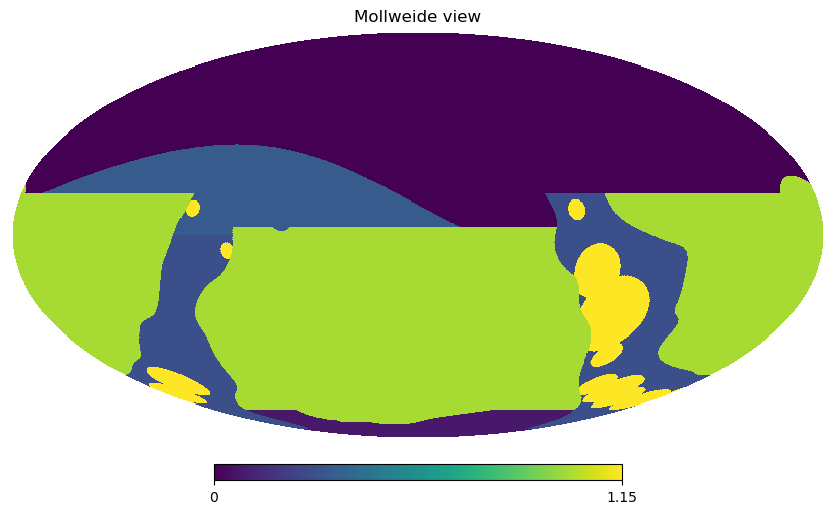

In [119]:
# look at the r-band
# r band and i band cover the entire LSST footprint, and are the most relevant for ToO (g too)
hp.mollview(maps_arr['r'])

In [121]:
maskedArr = np.zeros_like(maps_arr['r'])

In [104]:
for j in np.arange(len(maskedArr)):
    if (maps_arr["r"][j]==0 and maps_arr["g"][j]==0) and (maps_arr["i"][j]==0 and maps_arr["z"][j]==0):
        maskedArr[j]=0
    else:
        maskedArr[j]=1 

In [124]:
_18kMap = hp.read_map("https://gracedb.ligo.org/api/superevents/S250818k/files/bayestar.fits.gz")
_18kMap = hp.ud_grade(_18kMap,32)

In [144]:
# # np.shape(_18kMap)
# points = np.array([(np.float64(297.49999999999994), np.float64(63.44828368030106)),
# (np.float64(302.5), np.float64(63.44828368030106)),
# (np.float64(307.5), np.float64(63.44828368030106)),
# (np.float64(312.5), np.float64(63.44828368030106)),
# (np.float64(317.5), np.float64(63.44828368030106)),
# (np.float64(296.05263157894734), np.float64(61.9438370231567)),
# (np.float64(300.7894736842105), np.float64(61.9438370231567)),
# (np.float64(290.25), np.float64(60.43443884495228)),
# (np.float64(280.7142857142857), np.float64(58.91977535280315)),
# (np.float64(285.0), np.float64(58.91977535280315)),
# (np.float64(267.9545454545455), np.float64(57.39952353962294)),
# (np.float64(272.04545454545456), np.float64(57.39952353962294)),
# (np.float64(276.1363636363636), np.float64(57.39952353962294)),
# (np.float64(264.1304347826087), np.float64(55.873350435251986)),
# (np.float64(268.04347826086956), np.float64(55.873350435251986)),
# (np.float64(260.625), np.float64(54.34091230386124)),
# (np.float64(264.37499999999994), np.float64(54.34091230386124)),
# (np.float64(268.125), np.float64(54.34091230386124)),
# (np.float64(261.0), np.float64(52.80185378173063)),
# (np.float64(264.6), np.float64(52.80185378173063)),
# (np.float64(257.88461538461536), np.float64(51.25580694880489)),
# (np.float64(261.34615384615387), np.float64(51.25580694880489)),
# (np.float64(255.00000000000003), np.float64(49.702390326630685)),
# (np.float64(258.3333333333333), np.float64(49.702390326630685)),
# (np.float64(252.32142857142856), np.float64(48.141207794360284)),
# (np.float64(255.5357142857143), np.float64(48.141207794360284)),
# (np.float64(249.82758620689657), np.float64(46.57184741344958)),
# (np.float64(252.9310344827586), np.float64(46.57184741344958)),
# (np.float64(256.0344827586207), np.float64(46.57184741344958)),
# (np.float64(247.49999999999997), np.float64(44.993880150457116)),
# (np.float64(250.50000000000003), np.float64(44.993880150457116)),
# (np.float64(253.5), np.float64(44.993880150457116)),
# (np.float64(245.3225806451613), np.float64(43.406858485936986)),
# (np.float64(248.2258064516129), np.float64(43.406858485936986)),
# (np.float64(251.1290322580645), np.float64(43.406858485936986)),
# (np.float64(243.28125), np.float64(41.81031489577859)),
# (np.float64(246.09374999999991), np.float64(41.81031489577859)),
# (np.float64(248.90625000000003), np.float64(41.81031489577859)),
# (np.float64(241.875), np.float64(40.228184728061095)),
# (np.float64(244.68749999999997), np.float64(40.228184728061095)),
# (np.float64(247.49999999999997), np.float64(40.228184728061095)),
# (np.float64(240.46874999999994), np.float64(38.68218745348943)),
# (np.float64(243.28125), np.float64(38.68218745348943)),
# (np.float64(246.09374999999991), np.float64(38.68218745348943)),
# (np.float64(239.0625), np.float64(37.16889965599944)),
# (np.float64(241.875), np.float64(37.16889965599944)),
# (np.float64(244.68749999999997), np.float64(37.16889965599944)),
# (np.float64(240.46874999999994), np.float64(35.68533471265204)),
# (np.float64(243.28125), np.float64(35.68533471265204)),
# (np.float64(239.0625), np.float64(34.228866327812575)),
# (np.float64(241.875), np.float64(34.228866327812575)),
# (np.float64(237.65625), np.float64(32.79716829582364)),
# (np.float64(240.46874999999994), np.float64(32.79716829582364)),
# (np.float64(236.25), np.float64(31.38816646434855)),
# (np.float64(239.0625), np.float64(31.38816646434855)),
# (np.float64(234.84374999999997), np.float64(29.999999999999993)),
# (np.float64(237.65625), np.float64(29.999999999999993)),
# (np.float64(233.43750000000003), np.float64(28.630989836924343)),
# (np.float64(236.25), np.float64(28.630989836924343)),
# (np.float64(232.03124999999997), np.float64(27.27961273597809)),
# (np.float64(234.84374999999997), np.float64(27.27961273597809)),
# (np.float64(233.43750000000003), np.float64(25.944479772370002)),
# (np.float64(232.03124999999997), np.float64(24.62431835216408)),
# (np.float64(230.62499999999994), np.float64(23.31795706533424)),
# (np.float64(233.43750000000003), np.float64(23.31795706533424)),
# (np.float64(229.21874999999997), np.float64(22.02431283704216)),
# (np.float64(232.03124999999997), np.float64(22.02431283704216)),
# (np.float64(227.8125), np.float64(20.742379954487134)),
# (np.float64(230.62499999999994), np.float64(20.742379954487134)),
# (np.float64(229.21874999999997), np.float64(19.47122063449069)),
# (np.float64(227.8125), np.float64(18.209956864283)),
# (np.float64(229.21874999999997), np.float64(16.957763300004146)),
# (np.float64(227.8125), np.float64(15.713861048008212)),
# (np.float64(226.40625), np.float64(14.477512185929925)),
# (np.float64(224.99999999999997), np.float64(13.24801490567694)),
# (np.float64(226.40625), np.float64(12.024699180565818)),
# (np.float64(224.99999999999997), np.float64(10.806922874860334)),
# (np.float64(43.59374999999999), np.float64(-12.024699180565818)),
# (np.float64(45.0), np.float64(-13.248014905676953)),
# (np.float64(43.59374999999999), np.float64(-14.477512185929939)),
# (np.float64(46.40625), np.float64(-14.477512185929939)),
# (np.float64(45.0), np.float64(-15.713861048008212)),
# (np.float64(46.40625), np.float64(-16.957763300004146)),
# (np.float64(45.0), np.float64(-18.209956864283015)),
# (np.float64(47.8125), np.float64(-18.209956864283015)),
# (np.float64(46.40625), np.float64(-19.47122063449069)),
# (np.float64(47.8125), np.float64(-20.74237995448715)),
# (np.float64(49.21875), np.float64(-22.02431283704216)),
# (np.float64(50.62499999999999), np.float64(-23.31795706533424)),
# (np.float64(49.21875), np.float64(-24.62431835216408)),
# (np.float64(52.03125), np.float64(-24.62431835216408)),
# (np.float64(50.62499999999999), np.float64(-25.944479772370016)),
# (np.float64(53.4375), np.float64(-25.944479772370016)),
# (np.float64(52.03125), np.float64(-27.27961273597809)),
# (np.float64(53.4375), np.float64(-28.630989836924357)),
# (np.float64(54.84375), np.float64(-30.000000000000014)),
# (np.float64(53.4375), np.float64(-31.388166464348544)),
# (np.float64(56.24999999999999), np.float64(-31.388166464348544)),
# (np.float64(54.84375), np.float64(-32.79716829582364)),
# (np.float64(57.656249999999986), np.float64(-32.79716829582364)),
# (np.float64(56.24999999999999), np.float64(-34.22886632781257)),
# (np.float64(59.0625), np.float64(-34.22886632781257)),
# (np.float64(57.656249999999986), np.float64(-35.68533471265205)),
# (np.float64(60.46875), np.float64(-35.68533471265205)),
# (np.float64(59.0625), np.float64(-37.168899655999454)),
# (np.float64(61.87499999999999), np.float64(-37.168899655999454)),
# (np.float64(60.46875), np.float64(-38.68218745348943)),
# (np.float64(63.28125), np.float64(-38.68218745348943)),
# (np.float64(61.87499999999999), np.float64(-40.22818472806108)),
# (np.float64(64.6875), np.float64(-40.22818472806108)),
# (np.float64(63.28125), np.float64(-41.81031489577862)),
# (np.float64(66.09375), np.float64(-41.81031489577862)),
# (np.float64(65.32258064516128), np.float64(-43.40685848593699)),
# (np.float64(68.22580645161291), np.float64(-43.40685848593699)),
# (np.float64(67.5), np.float64(-44.99388015045713)),
# (np.float64(70.5), np.float64(-44.99388015045713)),
# (np.float64(66.72413793103448), np.float64(-46.5718474134496)),
# (np.float64(69.82758620689656), np.float64(-46.5718474134496)),
# (np.float64(72.93103448275862), np.float64(-46.5718474134496)),
# (np.float64(69.10714285714286), np.float64(-48.1412077943603)),
# (np.float64(72.32142857142857), np.float64(-48.1412077943603)),
# (np.float64(75.53571428571429), np.float64(-48.1412077943603)),
# (np.float64(71.66666666666667), np.float64(-49.702390326630706)),
# (np.float64(75.0), np.float64(-49.702390326630706)),
# (np.float64(74.42307692307692), np.float64(-51.25580694880492)),
# (np.float64(77.88461538461539), np.float64(-51.25580694880492)),
# (np.float64(77.39999999999999), np.float64(-52.801853781730614)),
# (np.float64(81.0), np.float64(-52.801853781730614)),
# (np.float64(76.87499999999999), np.float64(-54.340912303861245)),
# (np.float64(80.625), np.float64(-54.340912303861245)),
# (np.float64(84.375), np.float64(-54.340912303861245)),
# (np.float64(80.21739130434783), np.float64(-55.87335043525198)),
# (np.float64(84.13043478260869), np.float64(-55.87335043525198)),
# (np.float64(88.04347826086958), np.float64(-55.87335043525198)),
# (np.float64(87.95454545454545), np.float64(-57.39952353962295)),
# (np.float64(92.04545454545455), np.float64(-57.39952353962295)),
# (np.float64(96.13636363636364), np.float64(-57.39952353962295)),
# (np.float64(96.42857142857143), np.float64(-58.91977535280316)),
# (np.float64(100.71428571428572), np.float64(-58.91977535280316)),
# (np.float64(105.0), np.float64(-58.91977535280316)),
# (np.float64(101.25), np.float64(-60.4344388449523)),
# (np.float64(105.75000000000001), np.float64(-60.4344388449523)),
# (np.float64(110.24999999999999), np.float64(-60.4344388449523)),
# (np.float64(106.57894736842105), np.float64(-61.94383702315673)),
# (np.float64(111.31578947368422), np.float64(-61.94383702315673)),
# (np.float64(124.41176470588236), np.float64(-64.94808409550689))])

In [126]:
i = np.flipud(np.argsort(_18kMap))
sorted_credible_levels = np.cumsum(_18kMap[i])
credible_levels = np.empty_like(sorted_credible_levels)
credible_levels[i] = sorted_credible_levels

In [129]:
maskedArr2 = np.zeros_like(_18kMap)
maskedArr2[credible_levels <= 0.9] =2
maskedArr2[credible_levels <= 0.5] =1

In [109]:
len(np.where(maskedArr==2)[0])*hp.nside2pixarea(nside,degrees=True)

np.float64(41252.96124941927)

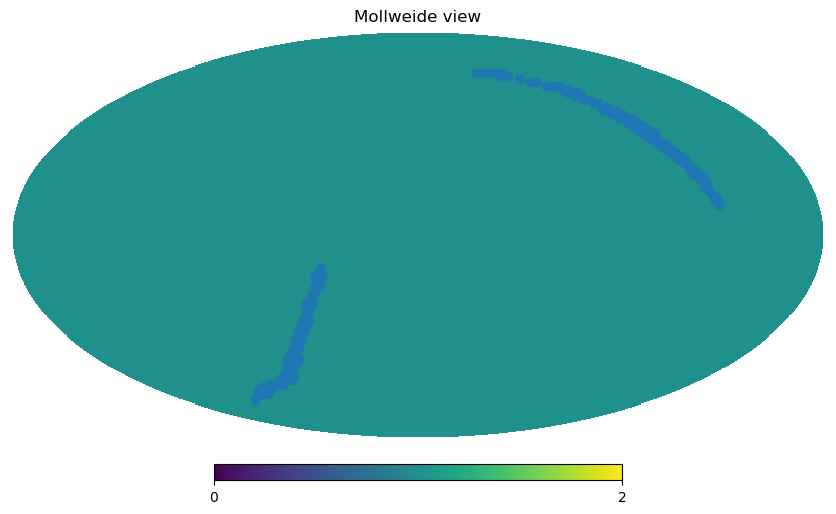

In [147]:
hp.mollview(maskedArr2)
hp.projscatter(points[:,0],points[:,1],lonlat=True)
# hp.projscatter(237.9757129,30.9023146,lonlat=True,marker="+",color="red")
# hp.projscatter(46.9757129,-20.9023146,lonlat=True,marker="+",color="red")

In [10]:
CBCs = pd.read_csv("../data/llpic-ra-dec-distance-mdc.csv",names=["RA","DEC","DIST"])

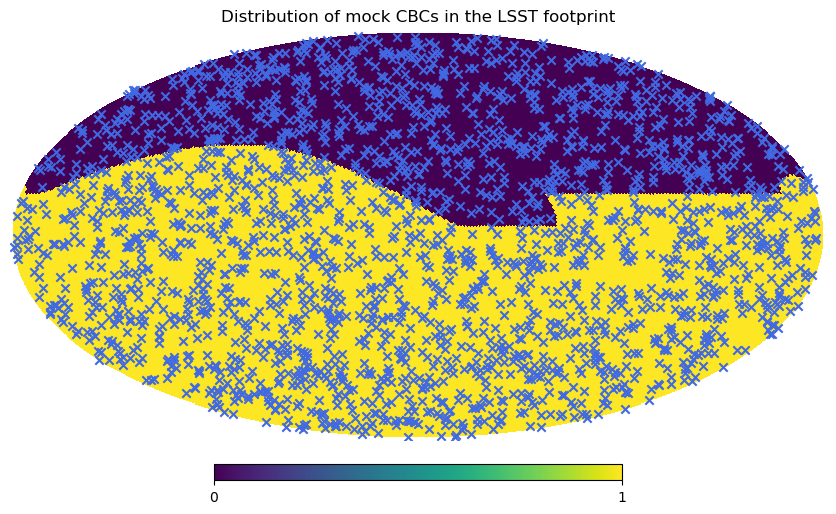

In [11]:
hp.mollview(maskedArr,title="Distribution of mock CBCs in the LSST footprint",min=0, max=1)
hp.projscatter(CBCs["RA"]*180/np.pi,CBCs["DEC"]*180/np.pi,lonlat=True,marker="x",color="royalblue")

plt.show()

In [12]:
boolArr = []
for __,row in CBCs.iterrows():
    pix = hp.ang2pix(64,row["RA"]*180/np.pi,row["DEC"]*180/np.pi,lonlat=True)
    if maskedArr[pix]:
        boolArr.append(True)
    else:
        boolArr.append(False)

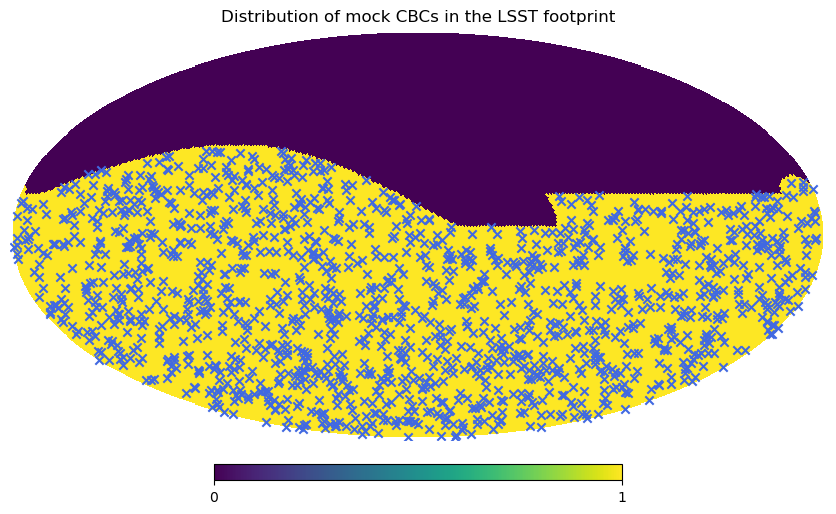

In [13]:
hp.mollview(maskedArr,title="Distribution of mock CBCs in the LSST footprint",min=0, max=1)
hp.projscatter(CBCs["RA"][boolArr]*180/np.pi,CBCs["DEC"][boolArr]*180/np.pi,lonlat=True,marker="x",color="royalblue")

plt.show()

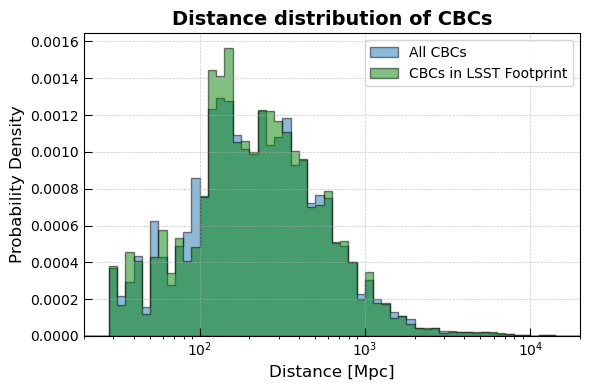

In [14]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.semilogx()
ax.set_xlim(20,2E4)
bins = 10**(np.arange(0,4.5,step=0.05))
# Histogram
ax.hist(CBCs["DIST"],
        bins=bins,
        density=True,
        color='C0',
        edgecolor='black',
        alpha=0.5,
        histtype='stepfilled',
        label="All CBCs")

ax.hist(CBCs["DIST"][boolArr],
        bins=bins,
        density=True,
        color='green',
        edgecolor='black',
        alpha=0.5,
        histtype='stepfilled',
        label="CBCs in LSST Footprint")

# Labels and title
ax.set_title("Distance distribution of CBCs", fontsize=14, weight='bold')
ax.set_xlabel("Distance [Mpc]", fontsize=12)
ax.set_ylabel("Probability Density", fontsize=12)

# Ticks and grid
ax.tick_params(axis='both', which='major', labelsize=10, direction='in', length=6)
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
ax.legend()

# Layout adjustment
plt.tight_layout()

# Save or show
# plt.savefig("histogram.pdf", dpi=300, bbox_inches='tight')
plt.show()

In [15]:
len(CBCs["DIST"][boolArr])

1519